In [1]:
from sklearn.datasets import make_regression
import numpy as np 

In [2]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1,n_targets=1,noise=80,random_state=13)

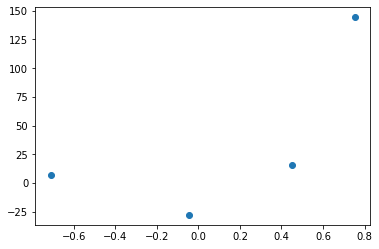

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

# Lets apply OLS

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(X,y) 

LinearRegression()

In [6]:
reg.coef_

array([78.35063668])

In [7]:
reg.intercept_

26.15963284313262

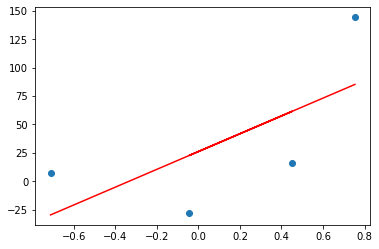

In [8]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color = 'red')
plt.show()  

In [9]:
m = 78.35 # slope
b = 0     # intercept
lr = .01  # learning rate

In [11]:
# First Iteration 
b_old = b 
loss_slope = -2 * np.sum(y - m * X - b_old)
b_new = b_old - lr * loss_slope

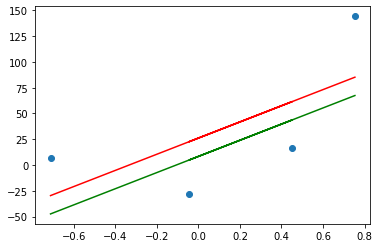

In [12]:
y_new = m * X + b_new
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color = 'red')
plt.plot(X, y_new, color = 'green')
plt.show()

In [13]:
# 2nd Iteration 
b_old = b_new 
loss_slope = -2 * np.sum(y - m * X - b_old)
b_new = b_old - lr * loss_slope

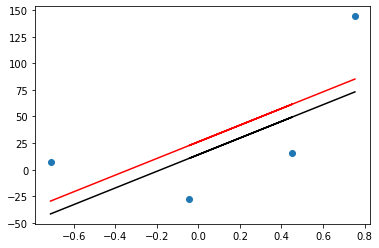

In [14]:
y_new = m * X + b_new
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color = 'red')
plt.plot(X, y_new, color = 'black')
plt.show()

## Let's create our own custom class which has GD 

In [15]:
np.random.randint(0,100, size = 1)

array([75])

In [34]:
class GDRegressior:
    def __init__(self, lr, epochs) -> None:
        self.m = 100 # np.random.randint(-100,100, size = 1)
        self.b = -120 # np.random.randint(-100,100, size = 1)
        self.lr = lr 
        self.epochs = epochs
    
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
            
            self.b = self.b - self.lr * loss_slope_b
            self.m = self.m - self.lr * loss_slope_m
            
        print(self.m, self.b)
    
    def predict(self, X):
        return self.m * X + self.b

In [17]:
gd = GDRegressior(.01, 1000)

In [18]:
gd.fit(X,y)

78.35063668049281 26.15963284296895


In [19]:
from sklearn.metrics import r2_score

In [20]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

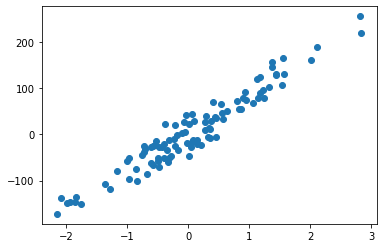

In [24]:
plt.scatter(X,y)
plt.show()


In [25]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

1.6081999328512735
[81.08527913]


In [47]:
gd = GDRegressior(0.001, 50)

In [48]:
gd.fit(X,y)

81.08721777464108 1.6055487215377666


## Applying Batch GD to m columns and n rows

In [50]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
X, y = load_diabetes(return_X_y=True)

In [54]:
X.shape, y.shape

((442, 10), (442,))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.intercept_, lr.coef_)
print("r2 score:", r2_score(y_test, y_pred))

151.34560453985995 [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
r2 score: 0.45260276297191937


In [69]:
class GdRegress:
    def __init__(self, epochs = 100, lr = .01):
        self.epochs = epochs
        self.lr = lr
        self.intercept_ = None 
        self.coef_ = None

    
    def fit(self, X_train, y_train):
        # Initialize intercept and coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            y_pred = self.intercept_ + np.dot(X_train, self.coef_)
            intercept_der = -2 * np.mean(y_train- y_pred )
            self.intercept_ = self.intercept_ - self.lr * intercept_der
            
            coef_der = - 2 * np.dot((y_train - y_pred), X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - self.lr * coef_der
        print(self.intercept_, self.coef_)        
    
    def predict(self, X_test):
        return self.intercept_ + np.dot(X_test, self.coef_)

In [77]:
gdr = GdRegress(lr = .3,epochs=1000)
gdr.fit(X_train, y_train)

151.54714689595525 [  49.8060384  -151.19942908  447.01962086  296.09922082  -39.52069626
  -85.7468774  -204.44676899  147.35418698  337.01730329  138.8044149 ]


In [78]:
y_pred = gdr.predict(X_test)
print("r2 score:", r2_score(y_test, y_pred))

r2 score: 0.4582179106998815
